# Proyecto Machine Learning I
En este archivo realice ciertos pasos de los datos, les recomiendo tomarlo como punto de partida para su proyecto. La idea es que implementen algún algoritmo de clasificación qué nos sugiera un outcome para futuros pacientes.

La rúbrica para evaluarlos será así:

                                    Puntos
    Implementación scratch            3   
    Implementación sklearn            2
    Predicción del modelo             3
    PDF explicando su proyecto        2
    Comparación scratch/sklearn       1
    Código comentado                 +1
    
    Total                            11

Espero les sea útil, suerte


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

El primer paso es importar los datos. Yo les adjunte un archivo csv, los datos fueron tomados de https://www.kaggle.com/covid19 

**Fun fact:** Kaggle es una buena plataforma para aprender y desarrollarse como cientificos de datos, los interesados revisenlo. 

In [1]:
data = pd.read_csv('https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/COVID19_open_line_list.csv')
#Adelantaré un poco de la limpieza de los datos, había muchas columnas con Unnamed que no contenian 
#algo importante entonces las elimine
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True)
data.head()

NameError: ignored

In [ ]:
#Para que se den una idea de que hay en el dataset, obviamente no deberán tener en cuenta todas las 
#columnas, las que puedo sugerirles que pueden afectar en el resultado de los pacientes son: 
#age, sex, symptoms, chronic disease
list(data.columns.values)

['ID',
 'age',
 'sex',
 'city',
 'province',
 'country',
 'wuhan(0)_not_wuhan(1)',
 'latitude',
 'longitude',
 'geo_resolution',
 'date_onset_symptoms',
 'date_admission_hospital',
 'date_confirmation',
 'symptoms',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'source',
 'sequence_available',
 'outcome',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'admin3',
 'admin2',
 'admin1',
 'country_new',
 'admin_id',
 'data_moderator_initials']

In [ ]:
#las etiquetas finales (HINT: aprendizaje supervisado) corresponde a
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

Algo de lo que no tocamos mucho en el curso pero es importante para ML es el formato de los datos.  

Recuerden que cuando hacen un programa el usuario es su peor enemigo, en este caso las personas que llenaron las bases de datos son sus peores enemigos. Notarán que hay muchas fechas en lugares dónde no corresponden o variaciones entre como escribieron datos categóricos como en el siguiente ejemplo: "death", "died" y "Death", para que no haya problemas debemos intentar que nuestros datos sean del mismo tipo y homogenizar los términos de los datos categóritos, aquí lo hago dos funciones que pueden servirles como molde y aplico para gráficar.

In [ ]:
def arreglarEtiquetas(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan #not a number, no generará errores al gráficar


In [ ]:
def regresarEntero(x):
    #Tal vez muchos no lo hayan visto pero igual que en java y otros lenguajes de programación 
    #Python te permite el manejo de excepciones, que son un tipo de error, donde se intenta un bloque
    #de código con try y si eso lleva a una excepción en vez de que generé que pare la ejecución 
    #puedes redirigir a otro bloque de código
    try:
        y = int(x) #En caso que la conversión levante una excepción
        return y
    except:
        return np.nan #Dicho valor se reasigna a not a number
    

De las características que decidan usar en su modelo final les sugieron revisar que tanto influyen. Son libres de usar los que quieran pero en la infección con SARS-CoV-2 desde un inicio se vio una tendencia de que con la edad aumentaba la mortalidad. 

Una forma de ilustrar dicho fenómeno es con el histograma siguiente, donde vemos la edad vs la resolución final del caso.

/home/adrmercurio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adrmercurio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


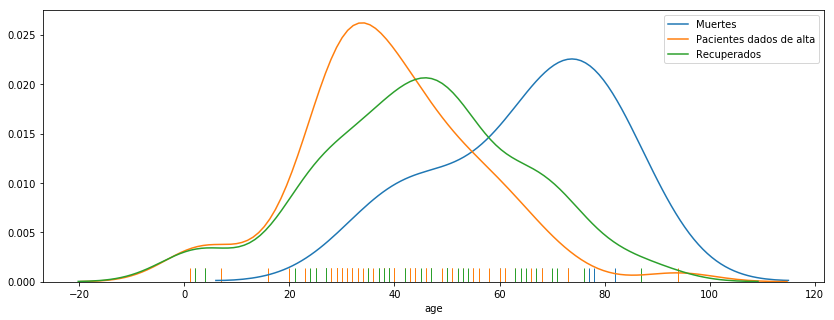

In [ ]:
plt.figure(figsize=(14,5))
#Plotearemos son seaborns (sns) las tres posibles resoluciones de los casos, notése que aplicamos las funciones a los datos para poderlos gráficar
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='death']['age'].apply(regresarEntero),hist=False,rug=True,label='Muertes')
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='discharge']['age'].apply(regresarEntero),hist=False,rug=True,label='Pacientes dados de alta')
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='recovered']['age'].apply(regresarEntero),hist=False,rug=True,label='Recuperados')

plt.legend()
plt.show()

A partir de aquí empieza su trabajo, pueden hacer algo sencillo pero deberán justificarlo y explicar dicho algoritmo en el PDF.

Suerte, y cualquier duda pueden contactarme.

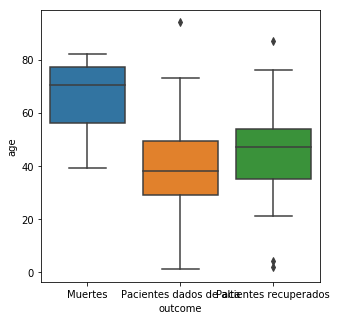

In [ ]:
muertes = pd.DataFrame(data[data['outcome'].apply(arreglarEtiquetas)=='death']['age'].apply(regresarEntero)).assign(outcome='Muertes')
dadosDeAlta = pd.DataFrame(data[data['outcome'].apply(arreglarEtiquetas)=='discharge']['age'].apply(regresarEntero)).assign(outcome='Pacientes dados de alta')
recuperados = pd.DataFrame(data[data['outcome'].apply(arreglarEtiquetas)=='recovered']['age'].apply(regresarEntero)).assign(outcome='Pacientes recuperados')
datosBoxPlot = pd.concat([muertes, dadosDeAlta, recuperados])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=datosBoxPlot)    
plt.show()